# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:180%;text-align:center;border-radius:12px 12px;">Lead Scoring Project</p>
**Author: Marcelo Cruz**<br>
Feel free to contact me: 
https://www.linkedin.com/in/marcelo-cruz-segura

# Table of Content
* [1. Problem Context](#1)

* [2. Prepare Work Enviroment](#2)

* [3. Load and inspect data](#3)

* [4. Data cleaning & Feature Engineering](#4)

* [5. Explore missing values](#5)

* [6. Exploratory Data Analysis](#6)

* [7. Data Wrangling](#7)

* [8. Modeling](#8)

* [9. Select the best models and tune them](#9)

* [10. Make our predictions](#10)

* [11. Conclusions](#11)

<img src='https://raw.githubusercontent.com/CeloCruz/LeadScoring/main/Lead%20Scoring%20(1).png'>

<a id="1"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">1. Problem Context</p>
Lead scoring is a process of assigning scores to prospects based on their profile and behavioral data in order to prioritize leads, improve close rates, and decrease buying cycles.

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.

**The typical lead conversion rate at X education is around 30%.**

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.

## 1.1. Business Goal
* **Goal from a business perspective**:<br>
X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
<br>

* **Goal from a Data Scientist perspective:**<br> Our mission is to build a better lead scoring model, targeting an 80% conversion rate and precision score. Using predict_proba(), we'll assess lead probabilities. This project aims to gain insights and emphasize a data-driven approach for success.

<a id="2"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">2. Prepare Work Enviroment</p>

## 2.1 Import Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from scipy.stats import linregress, uniform
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, roc_auc_score, precision_score, precision_recall_curve, PrecisionRecallDisplay, confusion_matrix

## 2.2 Suppress Warnings & display options

In [57]:
warnings.filterwarnings('ignore')

In [58]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

<a id="3"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">3. Load and inspect data</p>

In [59]:
df = pd.read_csv('Lead Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**Shape and info about the dataset**

In [60]:
df.shape

(9240, 37)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Initial thoughts and action plan:
1. 

<div class="alert alert-info" role= "alert">
    <span style='font-family:sans-serif'>
        <b>Initial thoughts and action plan: </b><br>
            <ul>
                <li>Check duplicates</li>
                <li>Drop Prospect ID and Lead Number (No additional information).</li>
                <li>Reformat columns names without space and lowercase for practicity, and change some columns name for others names more intuitive.</li>
                <li>Seems that we got a lot of binary columns, with only yes or no values etc. Convert it in binary encoding</li>
                <li> Use just numbers instead of the mix of strings and integers in columns: Asymmetrique Activity/Profile Index</li>
                <li>Do some text cleaning, some columns seems to have differents formats to present the same info.</li>
                <li>Decide what to do with all the "Select" data, if count it as null or assign an other category like "Not Answered".</li>
                <li>Handling missing values.</li>
    </span>    
</div>

**Check if the columns specified are really binary**

In [62]:
binary_cats = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
               'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

null_values = df[binary_cats].isnull().sum()
total = df[binary_cats].count()
yes_no = df[binary_cats].applymap(lambda x: 1 if x == 'Yes' or x == 'No' else 0).sum()
df_binary_cats = pd.DataFrame({'total': total,
                               'null_%': null_values/total*100,
                               'yes/no_%': yes_no/total*100})
df_binary_cats

,total,null_%,yes/no_%
Do Not Email,9240,0.0,100.0
Do Not Call,9240,0.0,100.0
Search,9240,0.0,100.0
Magazine,9240,0.0,100.0
Newspaper Article,9240,0.0,100.0
X Education Forums,9240,0.0,100.0
Newspaper,9240,0.0,100.0
Digital Advertisement,9240,0.0,100.0
Through Recommendations,9240,0.0,100.0
Receive More Updates About Our Courses,9240,0.0,100.0


* There's no missing values.
* All the columns have only "Yes" or "No" values.

## 3.1. Separate train and test datasets
**Let's separate train and test set before keep seeing more info.**<br>
Separating train and test data is essential to avoid data leakage, evaluate model generalization, and make unbiased performance assessments in machine learning. It ensures robust model development and reliable predictions on new, unseen data.

**Why stratify by target label?**<br>
Stratifying train and test datasets in classification ensures balanced class representation, guarding against biased or imbalanced model learning. It promotes accurate evaluation, preventing skewed performance metrics.

In [63]:
train, test = train_test_split(df, test_size=.2, random_state=12, stratify=df['Converted'])
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (7392, 37)
test shape: (1848, 37)


## 3.2. Inspecting only training dataset

In [64]:
print(f'In the train set are {train.duplicated().sum()} duplicates')

In the train set are 0 duplicates


**Check the values in Asymmetrique Index columns**

In [65]:
train['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
NaN          3362
02.Medium    2243
01.High      1762
03.Low         25
Name: count, dtype: int64

In [66]:
train['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
NaN          3362
02.Medium    3080
01.High       648
03.Low        302
Name: count, dtype: int64

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Assymetrique's columns treatment:</b><br>
        <ul>
        We have identified three distinct categories and some missing records. To improve the data's representativeness for machine learning modeling, we will focus on the integer values and reverse their order, emphasizing a higher-is-better perspective.<br><br>
                <li>High: Assigned a value of 3</li>
                <li>Medium: Assigned a value of 2</li>
                <li>Low: Assigned a value of 1</li>
        </ul>
    </span>
</div>

<a id="4"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">4. Data cleaning & Feature Engineering</p>
## 4.1 Data Cleaning
Let us embark on our first data cleaning endeavor! Our strategy involves transforming each step into Scikit-learn transformation objects, harmonizing the entire process into a unified pipeline.
<br><br>
**Why is it a commendable practice to conduct all preprocessing tasks using Scikit-learn?**<br>By encapsulating each step into transformation objects, we nurture modularity and reusability. This seamless integration in pipelines ensures consistent application to both training and test datasets, simplifying model selection and tuning while optimizing efficiency and scalability. Ultimately, this fosters a standardized and maintainable machine learning workflow.

In [67]:
def data_cleaning(df):
  """Do some of the data cleaning procedures that we
  specified at the begining of the notebook"""
  # drop columns id columns
  df = df.drop(['Prospect ID','Lead Number'], axis=1)

  # asymmetrique index columns transformation
  df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].str.split('.', expand=True)[0]\
                                                                        .str.replace('0','').str.replace('1','4')\
                                                                        .str.replace('3','1').str.replace('4','3')\
                                                                        .astype(np.float64
                                                                               )
  df['Asymmetrique Profile Index'] = df['Asymmetrique Profile Index'].str.split('.', expand=True)[0]\
                                                                        .str.replace('0','').str.replace('1','4')\
                                                                        .str.replace('3','1').str.replace('4','3')\
                                                                        .astype(np.float64
                                                                               )
  # binary encoding
  df[binary_cats] = df[binary_cats].applymap(lambda x: 0 if x == 'No' else 1)
    
  # rename columns for practicity
  df.columns = df.columns.str.replace(' ','_').str.lower()
  return df

# Convert custom function into transformer
initial_clean = FunctionTransformer(data_cleaning)

train_clean = initial_clean.fit_transform(train);

## 4.2 Inspecting category columns
In this stage, we'll first inspect the categorical columns from a practical and business-oriented perspective, before delving into more advanced statistical analysis.

> I firmly believe that simplicity often holds the key to effective solutions.

The goal is to take a first look through all category columns to do some feature engineering, extract some initial thoughts for future EDA/feature engineer and handling missing values.<br><br>
**For the sake of the notebook's shortness, I omitted outputs. Feel free to download the code and check it yourself!**

In [68]:
train_clean.lead_origin.value_counts(dropna=False);

In [69]:
train_clean.lead_source.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>It's probable that NaN values originated from an "Other" source.</li>
            <li>We should rename "google" to "Google."</li>
            <li>Probably "Pay Per Click Ads" originated from "Google."</li>
            <li>We can group "Referral Sites" with "Blog" and "WeLearnBlog_Home."</li>
            <li>We can group "Live Chat" into the same category as "Olark Chat."</li>
            <li>Group "bing" with "Organic Search."</li>
            <li>Group "Click2call," "Social Media," "testone," "Press_release," "youtubechannel," "NC_EDM," and "WeLearn" into the "Other" category.</li>
        </ul>
    </span>
</div>


In [70]:
train_clean.last_activity.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Group "Email Received" with "SMS Sent."</li>
            <li>Group "Email Marked Spam" with "Email Bounced" and "Unsubscribed" in a new category called "Not interested in email."</li>
            <li>Group "Resubscribed to emails" with "Email Opened."</li>
            <li>Group "Visited Booth in Tradeshow" and "View in browser link Clicked" into "Page Visited on Website," as they express the same level of interest, although not the same activity.</li>
        </ul>
    </span>
</div>


In [71]:
train_clean.country.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>"Unknown" and "Asia/Pacific Region" could be classified as "NaN" as they don't add additional information.</li>
            <li>Possibly group regions into "Europe" and "Rest of Asia/Oceania."</li>
        </ul>
    </span>
</div>

In [72]:
train_clean.specialization.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Group "E-COMMERCE" and "E-Business" into a single category called "e-commerce."</li>
            <li>Group "Banking, Investment And Insurance" with "Finance Management."</li>
            <li>Group "Media and Advertising" with "Marketing Management."</li>
        </ul>
    </span>
</div>



In [73]:
train_clean.how_did_you_hear_about_x_education.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insight:</b><br>
        <ul>
            <li>Group "SMS" and "Email" into a category called "SMS/Email."</li>
        </ul>
    </span>
</div>

In [74]:
train_clean.what_is_your_current_occupation.value_counts(dropna=False);

In [75]:
train_clean.what_matters_most_to_you_in_choosing_a_course.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insight:</b><br>
        <ul>
            <li>Considering the low occurrence of cases outside "Better Career Prospects" and "NaN," using the mode for replacement is prudent. However, thorough analysis and validation are crucial to avoid potential biases.</li>
        </ul>
    </span>
</div>


In [76]:
train_clean.tags.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Group "Invalid Number," "Wrong Number Given," "Number Not Provided," and "Oops Hangup" into a category called "Not Interested in Calls."</li>
            <li>Group "Interested in Full-Time MBA," "In Confusion Whether Part-Time or DLP," and "Interested in Next Batch" into a category called "Shows Certain Interest."</li>
            <li>Group "Lost to EINS," "In Touch with EINS," "Want to Take Admission but Has Financial Problems," "Recognition Issue (DEC Approval)," and "Graduation in Progress" as a new category called "Not Eligible for the Moment."</li>
            <li>Group "University Not Recognized" and "Diploma Holder (Not Eligible)" into a category called "Not Eligible."</li>
            <li>Group "Interested in Other Courses" and "Not Doing Further Education" as "Doesn't Show Interest."</li>
            <li>Group "Busy," "Ringing," and "Switched Off" into a new category called "Still No Contact."</li>
            <li>Group "Closed by Horizzon" in the same category as "Already a Student."</li>
            <li>Group "Shall Take in the Next Month" and "Still Thinking" into a category called "Not Sure."</li>
            <li>Consider grouping "Lateral Student," "Lost to Others," and the rest of the minor categories as "Others."</li>
        </ul>
    </span>
</div>

In [77]:
train_clean.lead_quality.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Possibly use `OrdinalEncoder`.</li>
            <li>Missing values might not be assigned yet to a category; in that case, we can group those values in the same category as "Not Sure."</li>
        </ul>
    </span>
</div>


In [78]:
train_clean.lead_profile.value_counts(dropna=False);

In [79]:
train_clean.city.value_counts(dropna=False);

In [80]:
train_clean.last_notable_activity.value_counts(dropna=False);

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insight:</b><br>
        <ul>
            <li>Apply the same procedure as used for the "Last Activity" column.</li>
        </ul>
    </span>
</div>


<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Data Manipulation:</b><br>
        Upon review, we found many "select" entries in columns, indicating potential blanks or unassigned values. We'll consider "select" as "Not Provided" instead of typical missing data in our analysis to better understand this pattern.
    </span>
</div>

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Possible Changes to Evaluate in Further Analysis:</b><br>
        <ul>
            <li>Reduce "Assymetrique" columns, which might contain redundant information.</li>
            <li>Consider the necessity of having both "last_activity" and "last_notable_activity" columns.</li>
            <li>Possibly use `OrdinalEncoder` in the Lead Quality column.</li>
            <li>Consider that missing values in the Lead Quality column might not be assigned yet to a category; in that case, they can be grouped with the same category as "Not Sure."</li>
            <li>Investigate the possibility that NaN values in the Lead Source column originated from an "Other" source.</li>
            <li>Possibly group regions in the country column into "Europe" and "Rest of Asia/Oceania."</li>
            <li>Consider dropping the "tags" column.</li>
        </ul>
    </span>
</div>

## 4.3 Initial feature engineering

**Apply initial changes described in the previous insights.**

In [81]:
def initial_feature_engineering(df):
  """Do some feature engineering"""
  # lead_source
  df['lead_source'] = df['lead_source'].str.replace('|'.join(['google','Pay per Click Ads']),'Google')
  df['lead_source'] = df['lead_source'].apply(lambda x: "Referral Sites" if 'blog' in str(x) else x)
  df['lead_source'] = df['lead_source'].str.replace('Live Chat','Olark Chat')
  df['lead_source'] = df['lead_source'].str.replace('bing','Organic Search')
  df['lead_source'] = df[df['lead_source'] != 'Other'].lead_source.apply(lambda x: "Other" if str(x) not in train_clean.lead_source.value_counts()[:8].index else x)
  # last_activity and last_notable_activity
  activity = ['last_activity','last_notable_activity']
  df[activity] = df[activity].apply(lambda x: x.str.replace('|'.join(['Email Received','SMS Sent']),'SMS/Email Sent'))
  df[activity] = df[activity].apply(lambda x: x.str.replace('|'.join(['Email Marked Spam','Email Bounced','Unsubscribed']),'Not interested in email'))
  df[activity] = df[activity].apply(lambda x: x.str.replace('Resubscribed to emails','Email Opened'))
  df[activity] = df[activity].apply(lambda x: x.str.replace('|'.join(['Visited Booth in Tradeshow','View in browser link Clicked']),'Page Visited on Website'))
  # country
  df['country'] = df['country'].apply(lambda x: np.nan if x in ['Unknown','unknown','Asia/Pacific Region'] else x)
  # specialization
  df['specialization'] = df['specialization'].str.replace('|'.join(['E-COMMERCE','E-Business']),'E-commerce')
  df['specialization'] = df['specialization'].str.replace('Banking, Investment And Insurance','Finance Management')
  df['specialization'] = df['specialization'].str.replace('Media and Advertising','Marketing Management')
  df['specialization'] = df['specialization'].str.replace('Select','Not Provided')
  # how_did_you_hear
  df['how_did_you_hear_about_x_education'] = df['how_did_you_hear_about_x_education'].str.replace('Select','Not Provided')
  df['how_did_you_hear_about_x_education'] = df['how_did_you_hear_about_x_education'].str.replace('|'.join(['SMS','Email']),'SMS/Email')
  # importance_in_course
  df['what_matters_most_to_you_in_choosing_a_course'] = df['what_matters_most_to_you_in_choosing_a_course'].str.replace('|'.join(['Flexibility & Convenience','Other']),"Better Career Prospects")
  # lead_profile
  df['lead_profile'] = df['lead_profile'].str.replace('Select','Not Assigned')
  # city
  df['city'] = df['city'].str.replace('Select','Not Provided')

  return df

initial_feature_engineering = FunctionTransformer(initial_feature_engineering)
train_clean = initial_feature_engineering.fit_transform(train_clean);

<a id="5"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">5. Explore missing values</p>

**Copy of the dataset and visualizations style**

In [82]:
train_ = train_clean.copy()

# Set style for better visualizations
train_eda = train.copy()
sns.set_style('dark')
sns.set(rc={'axes.grid':False})
sns.set_palette('viridis')

In [83]:
null_ = pd.DataFrame()
null_['proportion'] = np.round(train_clean.isnull().sum()/len(train_clean),4) * 100
null_['amount'] = train_clean.isnull().sum()

# Show only those columns with at least 1 missing value
null_.sort_values(by='proportion', ascending=False)[null_.amount > 0]

,proportion,amount
lead_quality,51.35,3796
asymmetrique_activity_index,45.48,3362
asymmetrique_profile_score,45.48,3362
asymmetrique_profile_index,45.48,3362
asymmetrique_activity_score,45.48,3362
tags,36.35,2687
lead_profile,29.40,2173
what_matters_most_to_you_in_choosing_a_course,29.40,2173
what_is_your_current_occupation,29.21,2159
country,26.50,1959


<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Missing values in certain columns, often requiring employee input, might stem from uncategorized leads. Streamlining lead management can improve data collection, inform decision-making, and optimize lead conversion strategies. Further investigation is necessary to confirm this hypothesis.
        </ul>
    </span>
</div>


**Define some plot functions**

In [84]:

def barplot_catcols(column,width,heigh):
  """Plot conversion rate"""
  fig, ax  = plt.subplots(figsize=(width,heigh))
  ax = sns.barplot(data=train_.fillna('NaN'), x='converted', y=column,
            order=order(train_.fillna('NaN'),column),
            orient='h', palette='viridis',
            seed=2)
  plt.title(f'Conversion Rate by {column.replace("_"," ").title()}', loc='left', size=18)
  return ax

def order(df,x,y=None):
    if y is not None:
        return df.groupby(x)[y].mean().sort_values(ascending=False).index
    else:
        return df.groupby(x)['converted'].mean().sort_values(ascending=False).index

## 5.1 How much of the missing values belong to the same people?

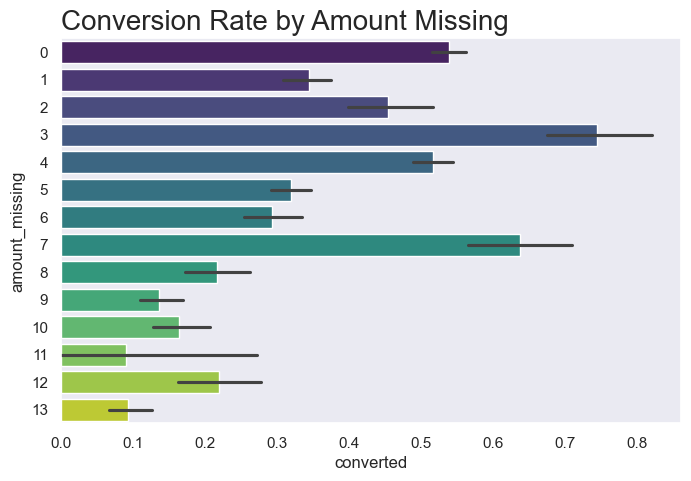

In [85]:
# Number of missing values in each row
train_['amount_missing'] = train_.isnull().sum(1)

# Plot the relation between amount missing and conversion rate
fig, ax  = plt.subplots(figsize=(8,5))
ax = sns.barplot(data=train_.fillna('NaN'), x='converted', y='amount_missing',
            orient='h', palette='viridis',
            seed=2)
plt.title(f'Conversion Rate by Amount Missing', loc='left', size=20)
plt.show()

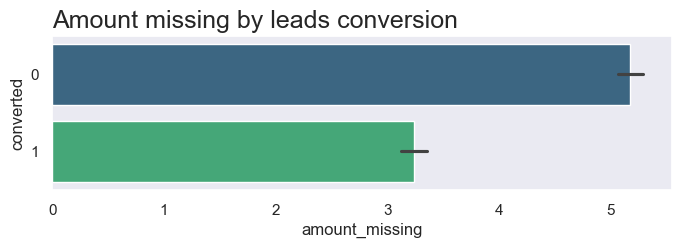

In [86]:
fig, ax  = plt.subplots(figsize=(8,2))
ax = sns.barplot(data=train_, x='amount_missing', y='converted',
            orient='h', palette=sns.color_palette('viridis',2),
            seed=2)
plt.title(f'Amount missing by leads conversion', loc='left', size=18)
plt.show()

## 5.2 Correlation of numerical columns with converted column

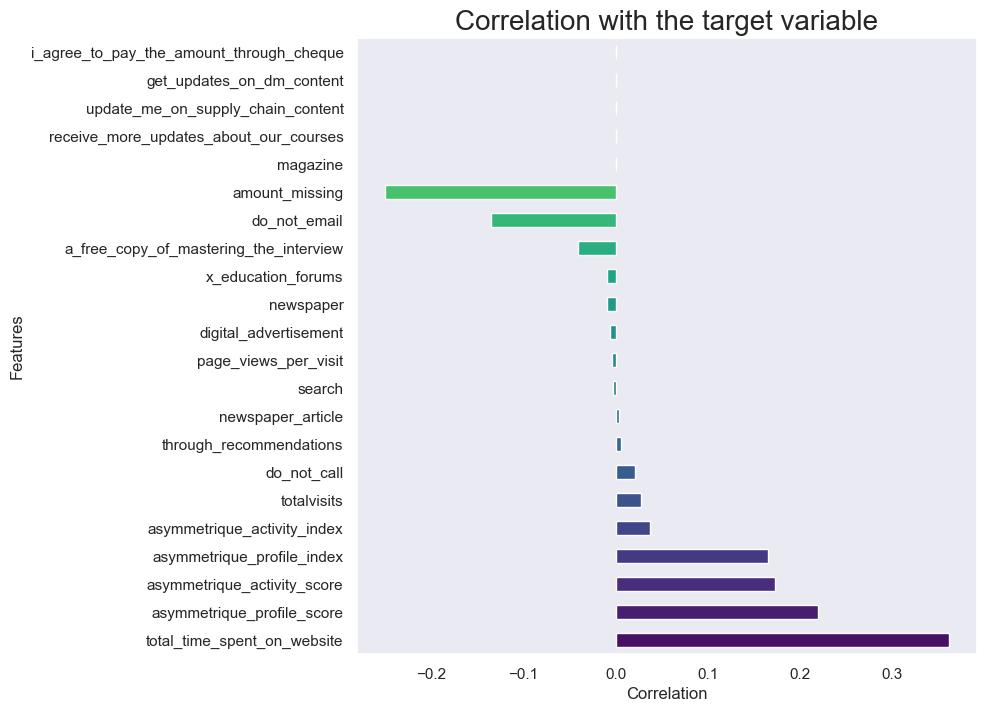

In [87]:
correlations = train_.select_dtypes('number').corr()['converted'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
correlations[1:].plot(kind='barh', 
                 color=sns.color_palette('viridis', len(correlations)))

plt.title('Correlation with the target variable', fontsize=20)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insight:</b><br>
        <ul>
            <li>There's a negative correlation between missing lead data and the conversion rate. Higher instances of missing data might signify incomplete or poorly managed lead information, leading to potential difficulties in accurately categorizing and nurturing leads.</li>
            <li>Notably, there's one column, "Total Time Spent On Website," which has a stronger correlation with the target variable than the number of missing values columns. This suggests that it might be a better potential predictor than most of the other features.</li>
        </ul>
    </span>
</div>


In [88]:
print(f'Duplicate rows from original dataset: {train.duplicated().sum()}')
print(f'Duplicate rows after feature engineer: {train_clean.duplicated().sum()}')

Duplicate rows from original dataset: 0
Duplicate rows after feature engineer: 984


<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Handle Missing Values:</b><br>
        We currently lack sufficient information to determine the best approach for dealing with missing values. To address this, we will conduct a detailed data exploration, searching for patterns related to lead conversion. Once we have a clearer understanding, we can devise the most appropriate strategy for handling these missing records.
    </span>
</div>


<a id="6"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">6. Exploratory Data Analysis</p>

Considering the prevalence of categorical or binary variables, we'll treat "NaN" values as a distinct category for comparison. For numerical columns with few "NaN" values, we'll exclude them to ensure robust analysis. This follows EDA best practices for gaining valuable insights from the dataset.

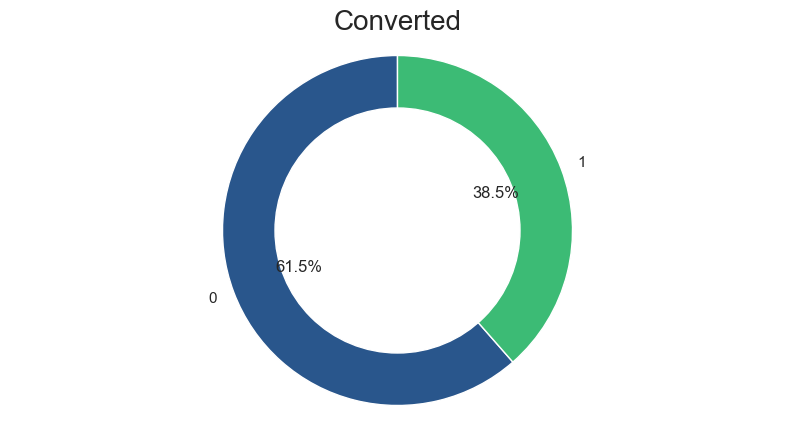

In [89]:
count = train_['converted'].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=['#29568CFF', '#3CBB75FF'])
ax.set_title('Converted', size=20)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insight:</b><br>
        The dataset exhibits a relatively balanced distribution of the target variable. While there may be some variations in class proportions, it's not extremely unbalanced.
    </span>
</div>


### Do we get redundant information among different columns?

In [90]:
train_.loc[:,'asymmetrique_activity_index':'asymmetrique_profile_score'].corr().style.background_gradient(cmap='vlag_r')

,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score
asymmetrique_activity_index,1.000000,-0.145399,0.855985,-0.122669
asymmetrique_profile_index,-0.145399,1.000000,-0.145366,0.883177
asymmetrique_activity_score,0.855985,-0.145366,1.000000,-0.114636
asymmetrique_profile_score,-0.122669,0.883177,-0.114636,1.000000


<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insight:</b><br>
        <ul>
            <li>As expected, there's a strong correlation between the "Score" and "Index" columns. Given the level of detail in the data, retaining the score columns appears to be a sound choice. These columns appear to offer valuable information, and their inclusion in our analysis is likely to yield valuable insights.
            </li>
        </ul>
    </span>
</div>


## 5.1 Categorical variables

### 5.1.1 Profile scoring and classifier

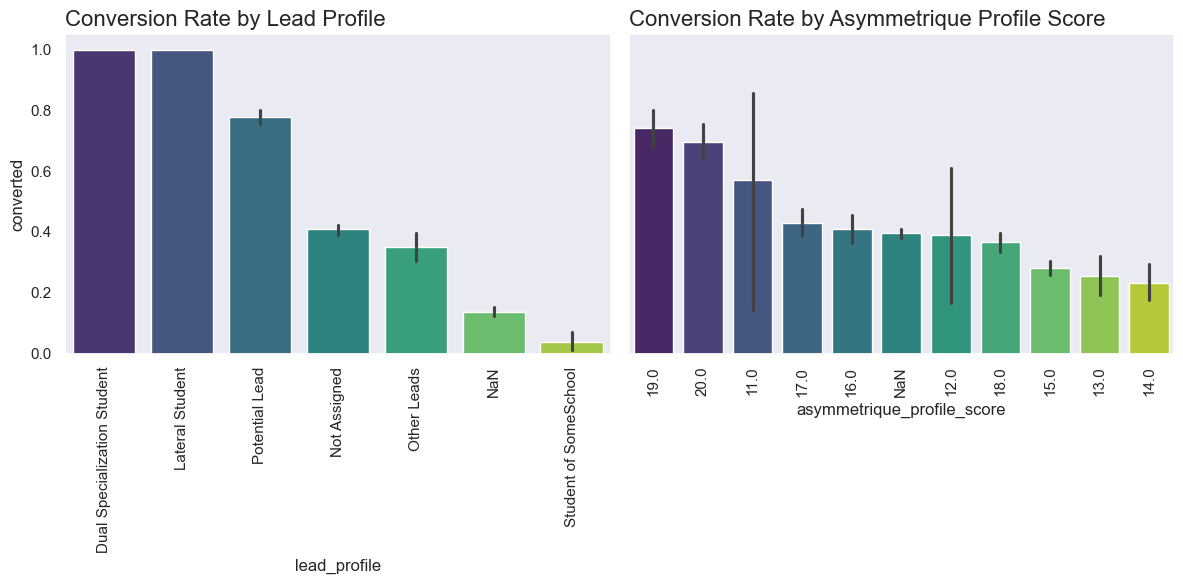

In [91]:
fig, ax  = plt.subplots(1,2, figsize=(12,6), sharey=True)

sns.barplot(data=train_.fillna('NaN'), x='lead_profile', y='converted',
            palette='viridis', order=order(train_.fillna('NaN'),'lead_profile'),
            seed=2, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title(f'Conversion Rate by Lead Profile', loc='left', size=16)

sns.barplot(data=train_.fillna('NaN'), x='asymmetrique_profile_score', y='converted',
                  palette='viridis', order=order(train_.fillna('NaN'),'asymmetrique_profile_score'),
                    seed=2, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title(f'Conversion Rate by Asymmetrique Profile Score', loc='left', size=16)

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>There's a significant difference in the conversion rate of people with "Not Assigned" and "NaN" values, which might suggest that they do not belong to the same group.</li>
            <li>Profile Score could be a better predictor than Lead Profile, as the conversion rate tends to increase with higher scores.</li>
            <li>Because both columns essentially represent the same information, it is advisable to drop the Lead Profile column for simplicity and clarity in the analysis.</li>
        </ul>
    </span>
</div>

### 5.1.2 Lead Activity

**Correlation between activity track record (columns related with the web) and activity/profile score**

In [92]:
activity_columns = ['totalvisits','total_time_spent_on_website','page_views_per_visit',
                    'asymmetrique_profile_score','asymmetrique_activity_score']

train_[activity_columns].corr().style.background_gradient(cmap='vlag_r')

,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_profile_score,asymmetrique_activity_score
totalvisits,1.000000,0.261952,0.598883,0.129016,-0.061397
total_time_spent_on_website,0.261952,1.000000,0.323684,0.167992,-0.066008
page_views_per_visit,0.598883,0.323684,1.000000,0.165945,-0.171264
asymmetrique_profile_score,0.129016,0.167992,0.165945,1.000000,-0.114636
asymmetrique_activity_score,-0.061397,-0.066008,-0.171264,-0.114636,1.000000


**Having columns about last activity and last notable activity provides more information?**

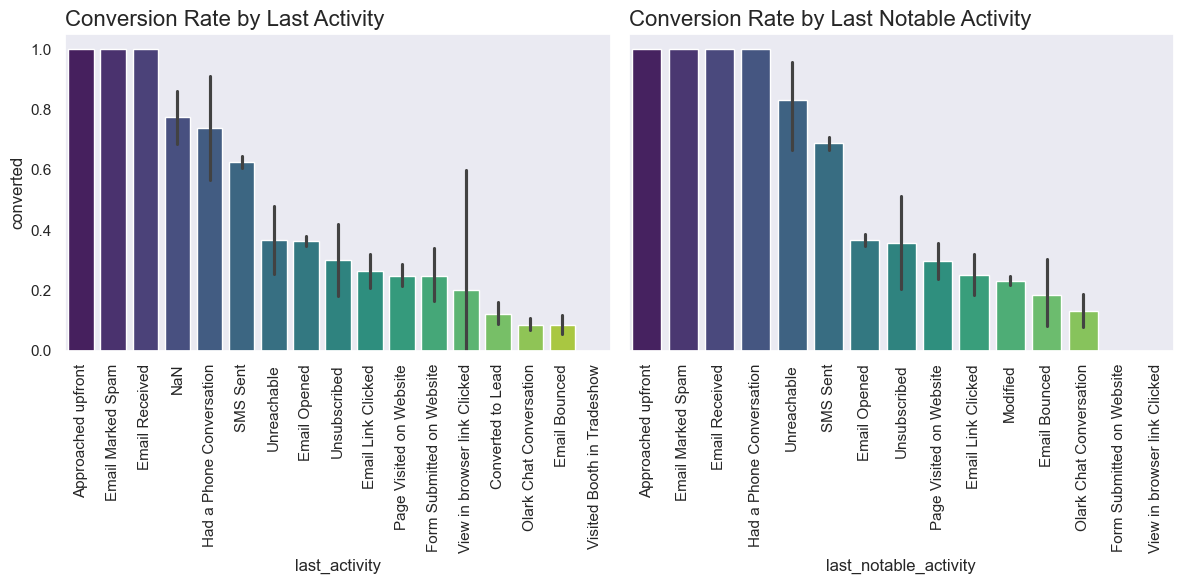

In [93]:
fig, ax  = plt.subplots(1,2, figsize=(12,6), sharey=True)

sns.barplot(data=train_.fillna('NaN'), x='last_activity', y='converted',
            order=order(train_.fillna('NaN'),'last_activity'),
            palette='viridis',
            seed=2, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title(f'Conversion Rate by Last Activity', loc='left', size=16)

sns.barplot(data=train_.fillna('NaN'), x='last_notable_activity', y='converted',
                  order=order(train_.fillna('NaN'),'last_notable_activity'),
                  palette='viridis', seed=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title(f'Conversion Rate by Last Notable Activity', loc='left', size=16)

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Activity Score seems to be a less effective predictor compared to Profile Score.</li>
            <li>No significant relationship was found between Activity Index and Last Activity, Last Notable Activity, or columns related to visits.</li>
            <li>There's no significant correlation among columns related to visits.</li>
            <li>Last Activity does not appear to provide substantially more information than Last Notable Activity. Hence, it may be preferable to retain Last Notable Activity.</li>
        </ul>
    </span>
</div>

<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Business Suggestion:</b><br>
        <ul>
            Our analysis reveals a significant correlation between phone conversations and lead conversions. To maximize results, consider increasing phone calls to leads. Prioritizing "Hot Leads" for calls can enhance resource allocation and boost conversion rates, ultimately driving better business outcomes.
        </ul>
    </span>
</div>







### 5.1.3 Lead Quality and Tags

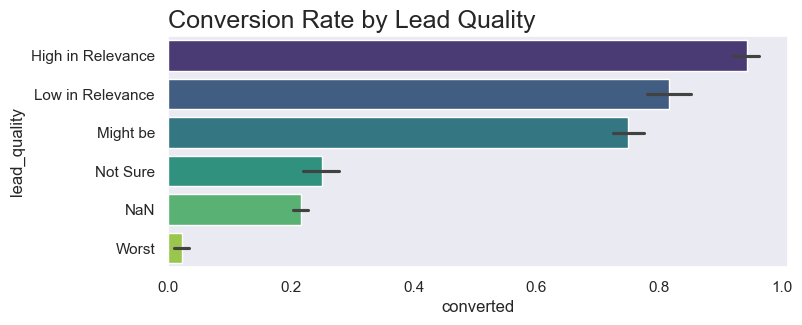

In [94]:
barplot_catcols('lead_quality',8,3)
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            NaN rows and Not Sure have similar conversion rate, it's possible that belong to the same group of people with the difference that some employees qualify as Not Sure, and others simply don't fill that field.
        </ul>
    </span>
</div>

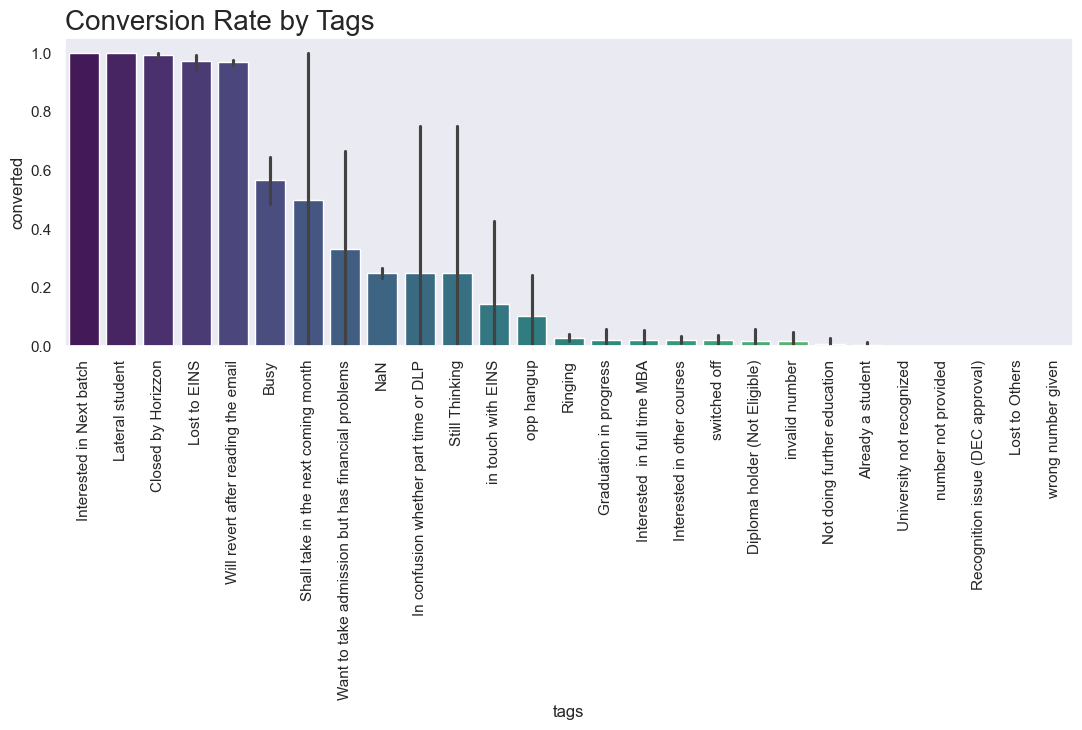

In [95]:
fig, ax  = plt.subplots(figsize=(13,4))

sns.barplot(data=train_.fillna('NaN'), x='tags', y='converted',
            order=order(train_.fillna('NaN'),'tags'),
            palette='viridis',
            seed=2)
plt.xticks(rotation=90)
plt.title(f'Conversion Rate by Tags', loc='left', size=20)
plt.show()

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Feature Engineer:</b><br>
        <ul>
            <li>Group "Invalid Number," "Wrong Number Given," and "Number Not Provided" into a category called "Not Interested in Calls."</li>
            <li>Group "In Confusion Whether Part-Time or DLP," "Interested in Next Batch," "Shall Take in the Next Month," and "Still Thinking" into a category called "Shows Certain Interest."</li>
            <li>Group "University Not Recognized" and "Diploma Holder (Not Eligible)" into a new category called "Not Eligible."</li>
            <li>Group "Interested in Other Courses," "Interested in Full-Time MBA," and "Not Doing Further Education" as "Doesn't Show Interest."</li>
            <li>Group "Ringing" and "Switched Off" in a new category called "Still No Contact."</li>
            <li>Group "Want to Take Admission But Has Financial Problems," "Recognition Issue (DEC Approval)," "Graduation in Progress" as a new category called "Not Eligible for the Moment."</li>
            <li>"Lateral Student," "Lost to Others," and the rest of the minor categories might be grouped as "Others."</li>
        </ul>
    </span>
</div>

### 5.1.4 Ocupation and Specialization

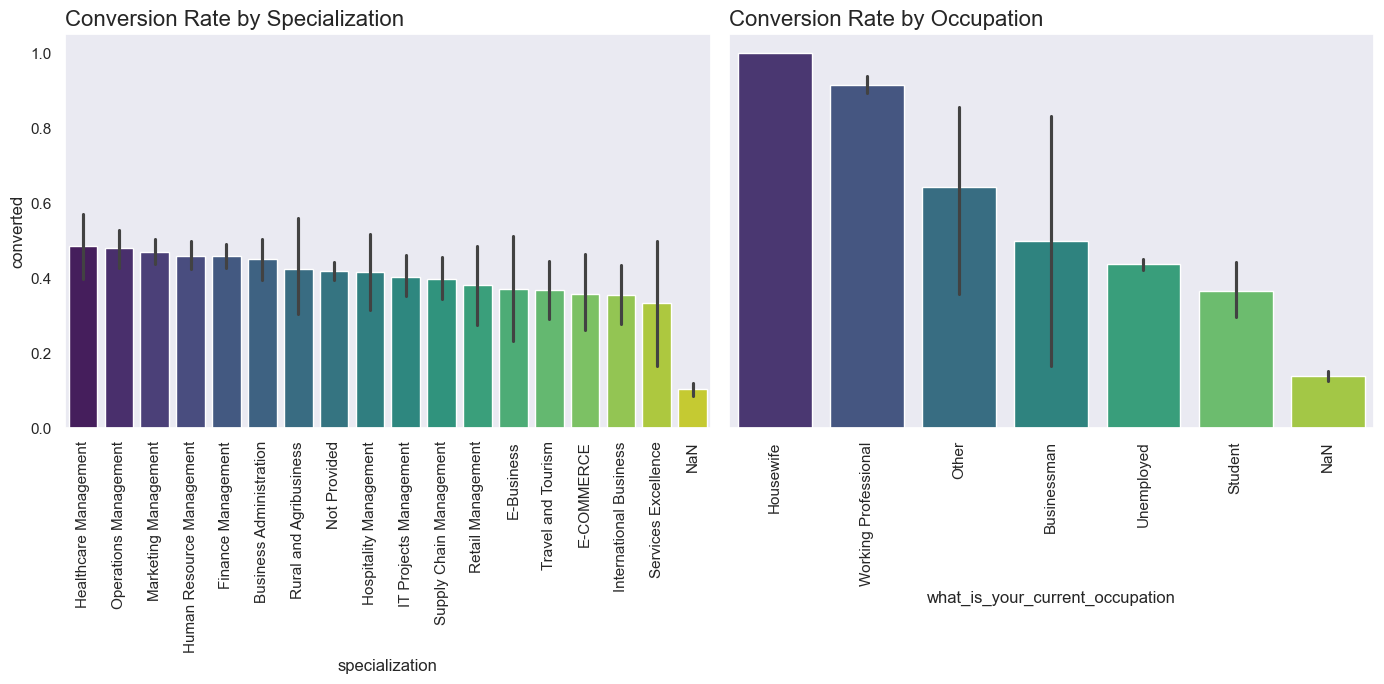

In [96]:
fig, ax  = plt.subplots(1,2, figsize=(14,7), sharey=True)

sns.barplot(data=train_.fillna('NaN'), x='specialization', y='converted',
            order=order(train_.fillna('NaN'),'specialization'),
            palette='viridis',
            seed=2, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title(f'Conversion Rate by Specialization', loc='left', size=16)

sns.barplot(data=train_.fillna('NaN'), x='what_is_your_current_occupation', y='converted',
                  order=order(train_.fillna('NaN'),'what_is_your_current_occupation'),
                  palette='viridis', seed=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title(f'Conversion Rate by Occupation', loc='left', size=16)

plt.tight_layout()
plt.show()

**Number of missing values for each row in these two categories**

In [103]:
train_[['what_is_your_current_occupation','specialization']].isnull().sum(1).value_counts()

0    5220
2    1141
1    1031
Name: count, dtype: int64

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ul>
            <li>Almost all (>99%) of the people with missing records in the specialization column are the same people with missing values in the current position.</li>
            <li>People with missing values in those categories have a significant difference in the conversion rate compared to the rest, including unemployed people.</li>
            <li>Grouping people by current occupation seems to exhibit more noticeable differences in the conversion rate between each category compared to grouping by specialization.</li>
        </ul>
    </span>
</div>

## 5.1.5 Geographic data

In [102]:
conversion_country = train_.groupby('country')['converted'].mean()
country_count = train_['country'].value_counts().sort_index()

fig = go.Figure(data=go.Choropleth(
    locations=conversion_country.index,
    locationmode='country names',
    z=conversion_country.values,
    text=country_count.values,
    colorscale='deep', 
    colorbar_title='Conversion Rate',
    hovertemplate='%{location}<br>Conversion: %{z:.2f}<br>Count: %{text}',
))

fig.update_geos(projection_type="mercator")

fig.update_layout(
    title='Conversion Rate by Country',
    geo=dict(showcoastlines=True),
    font=dict(size=16),
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [101]:
train_['country'].value_counts().sort_index()

country
Australia                  9
Bahrain                    6
Bangladesh                 2
Belgium                    2
Canada                     3
China                      2
Denmark                    1
France                     4
Germany                    4
Ghana                      2
Hong Kong                  3
India                   5201
Italy                      2
Kenya                      1
Kuwait                     3
Malaysia                   1
Netherlands                2
Nigeria                    4
Oman                       4
Philippines                1
Qatar                      9
Russia                     1
Saudi Arabia              17
Singapore                 21
South Africa               3
Sri Lanka                  1
Sweden                     2
Switzerland                1
Tanzania                   1
Uganda                     1
United Arab Emirates      49
United Kingdom            13
United States             57
Name: count, dtype: int64

In [ ]:
barplot_catcols('city',8,4)
plt.show()

**Is the geographic data correct?**

In [ ]:
print("Cities where country isn't India:")
train_[train_['country'] != 'India'].city.value_counts(dropna=False)

In [ ]:
print('Countries where City es equal to an Indian city:')
indian_cities = ['Mumbai','Thane & Outskirts','Other Cities of Maharashtra','Tier II Cities']
train_[train_.city.isin(indian_cities)].country.value_counts(dropna=False)

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Data Manipulation:</b><br>
        <ol>
            <li>We have incorrect information in the dataset. There are countries with cities that belong to India, so we can assume that due to the vast majority of customers from India in the dataset these countries should be replace it. Those rows that contains "Mumbai", "Thane & Outskirts", "Other Cities of Maharashtra" and "Tier II Cities" will be fill it with "India".</li>
            <li>Group all the countries that aren't in the top 5 most frequent in a category called "Other".</li>
            <li>People without information in the city column have a significantly lower conversion rate compared to others.</li>
        </ol>
    </span>
</div>


### 5.1.6 The source from which the customer heard about X Education and the source of the lead

In [ ]:
fig, ax  = plt.subplots(1,2, figsize=(14,7), sharey=True)

sns.barplot(data=train_.fillna('NaN'), x='lead_source', y='converted',
            order=order(train_.fillna('NaN'),'lead_source'),
            palette='viridis',
            seed=2, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title(f'Conversion Rate by Lead Source', loc='left', size=16)

sns.barplot(data=train_.fillna('NaN'), x='how_did_you_hear_about_x_education', y='converted',
                  order=order(train_.fillna('NaN'),'how_did_you_hear_about_x_education'),
                  palette='viridis', seed=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title(f'Conversion Rate by How Did You Hear About It', loc='left', size=16)

plt.tight_layout()
plt.show()



<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ol>
           Both columns present similar information. In that case, Lead Source seems to be a better potential predictor because of the lack of missing values. We'll keep only Lead Source.
        </ol>
    </span>
</div>

<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Business Suggestion:</b><br>
        <ol>
            Referrals, with a 90% conversion rate, are a top-performing lead source due to their trustworthiness. To capitalize on this potential, the business should incentivize, personalize, track, showcase testimonials, and leverage word-of-mouth marketing for effective growth.
        </ol>
    </span>
</div>

## 5.2 Numeric variables

In [ ]:
train_.select_dtypes(include=['number']).nunique().sort_values()

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Data Manipulation:</b><br>
        <ol>
            Almost all the numerical columns in the dataset represent binary outputs. But here's the catch: the vast majority of these columns have only one value, which is 0. That means they don't really offer any meaningful information to the model, and they're just cluttering up the dataset.
            <b>Thus, it would be wise to drop these columns to improve model performance and reduce unnecessary noise in the data.</b>
        </ol>
    </span>
</div>


### 5.2.1 Columns related to web visits

In [ ]:
fig, ax  = plt.subplots(3, figsize=(8,6))
sns.barplot(data=train_, x='totalvisits', y='converted',
            orient='h', palette='viridis',
            seed=2, ax=ax[0])
ax[0].set_title(f'Avg. Number of visits', loc='left', size=18)

sns.barplot(data=train_, x='total_time_spent_on_website', y='converted',
            orient='h', palette='viridis',
            seed=2, ax=ax[1])
ax[1].set_title(f'Avg. Time spent on website', loc='left', size=18)

sns.barplot(data=train_, x='page_views_per_visit', y='converted',
            orient='h', palette='viridis',
            seed=2, ax=ax[2])
ax[2].set_title(f'Avg. Page views per visit', loc='left', size=18)

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(8,6))
sns.boxplot(data=train_, x='totalvisits',
              ax=ax[0], palette='viridis')
ax[0].set_title('Total Visits', loc='left', size=16)

sns.boxplot(data=train_, x='total_time_spent_on_website',
              ax=ax[1], palette='viridis')
ax[1].set_title('Time spent on web', loc='left', size=16)

sns.boxplot(data=train_, x='page_views_per_visit',
              ax=ax[2], palette='viridis')
ax[2].set_title('Page views per visit', loc='left', size=16)

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <span style='font-family:sans-serif'>
        <b>Insights:</b><br>
        <ol>
            <li>There's a significant difference in conversion rate among both groups.</li>
            <li>Leads that convert more spent much more time on the website.</li>
        </ol>
    </span>
</div>

<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Business Suggestion:</b><br>
        <ol>
            To capitalize on this insight, we should enhance website engagement, optimize CTAs, and tailor content and offers based on lead preferences. Improving website navigation and implementing personalized lead nurturing campaigns can also boost conversion rates. Continuously monitoring performance and conducting A/B tests will allow for iterative improvements and better lead conversion outcomes.
        </ol>
    </span>
</div>

<a id="7"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">7. Data Wrangling</p>


**Outliers Treatment:**

Addressing outliers in `TotalVisits` and `Page Views Per Visit` is essential for model performance, particularly in Logistic Regression. Capping these variables at the 95th percentile is recommended for model stability and preventing inflated coefficients. It enhances model generalization in various classification models like Decision Trees, Random Forests, and Support Vector Machines.

**Missing Values Strategy:**

* Numeric Columns (`KNN Imputation`): Utilizing KNNImputer for imputing missing values in Total Visits and Page Views Per Visit is a preferable choice over median, mean, or mode imputation. KNNImputer considers feature relationships, preserving data distribution, and handling multicollinearity effectively.
<br>

* Categorical Columns (Missing Category): Treating missing values as a separate category, rather than imputing with the mode, maintains data integrity, avoids biases, and improves model reliability and accuracy, especially considering the significant difference in conversion rate between leads with missing records and others.

## 7.1 Feature Engineer

**Let's apply all the insights discovered during EDA.**

In [ ]:
def eda_feature_engineering(df):
  # tags column
  df['tags'] = df['tags'].str.replace('|'.join(['invalid number','wrong number given','number not provided']),'Not interest in calls')
  df['tags'] = df['tags'].str.replace('|'.join(["In confusion whether part time or DLP", "Interested in Next batch", "Shall take in the next coming month", "Still Thinking"]), "Shows certain interest")
  df['tags'] = df['tags'].str.replace("University not recognized","Not elegible")
  df['tags'] = df[df['tags'].notnull()].tags.apply(lambda x: 'Not elegible' if 'holder' in x else x)
  df['tags'] = df['tags'].str.replace('|'.join(["Interested in other courses", "Interested  in full time MBA", "Not doing further education"]),"Doesn't show interest")
  df['tags'] = df['tags'].str.replace('|'.join(["Ringing","switched off"]),"Still no contact")
  df['tags'] = df['tags'].str.replace('|'.join(["Want to take admission but has financial problems", "Graduation in progress"]),"Not elegible for the moment")
  df['tags'] = df[df['tags'].notnull()].tags.apply(lambda x: 'Not elegible for the moment' if 'Recognition' in x else x)
  df['tags'] = df[df['tags'].notnull()].tags.apply(lambda x: 'Other' if x not in df.tags.value_counts(dropna=False)[:12] else x)

  # country and city
  indian_cities = ['Mumbai','Thane & Outskirts','Other Cities of Maharashtra','Tier II Cities']
  df.loc[(df.country != 'India') & (df.city.isin(indian_cities)),'country'] = 'India'
  df['country'] = df.loc[df['country'].notnull(),'country'].apply(lambda x: 'Other' if x not in df.loc[df['country'] != 'Other','country'].value_counts()[:4] else x)

  # lead quality
  df['lead_quality'] = df['lead_quality'].fillna('Not Sure')

  # convert asymmetrique index columns in strings columns
  df[['asymmetrique_profile_index','asymmetrique_activity_index']] = df[['asymmetrique_profile_index','asymmetrique_activity_index']].astype(str)

  # drop columns with unique values
  drop_cols = ['magazine','receive_more_updates_about_our_courses','update_me_on_supply_chain_content',
               'get_updates_on_dm_content','i_agree_to_pay_the_amount_through_cheque']
  df = df.drop(drop_cols, axis=1)

  #add amount_missing column
  df['amount_missing'] = df.isnull().sum(1)
  return df

eda_feature_engineering = FunctionTransformer(eda_feature_engineering)

## 7.2 Handling Outliers

In [ ]:
def cap_outliers(df):
  """Replace outliers with the 95th percentile"""
  num_cols = ['totalvisits','page_views_per_visit','total_time_spent_on_website']
  df[num_cols[0]].apply(lambda x: df[num_cols[0]].quantile(.95) if x > df[num_cols[0]].quantile(.95) else x)
  df[num_cols[1]].apply(lambda x: df[num_cols[1]].quantile(.95) if x > df[num_cols[1]].quantile(.95) else x)
  df[num_cols[2]].apply(lambda x: df[num_cols[2]].quantile(.95) if x > df[num_cols[2]].quantile(.95) else x)
  return df

cap_outliers = FunctionTransformer(cap_outliers);

## 7.3 Handling missing values and scaling columns for modeling
1. Apply `OneHotEncoder` to all the categorical columns.
2. Apply `StandardScaler` to the numeric columns if there aren't binary.

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Note:</b><br>
        In the remainder='drop' process, we'll be removing the following columns, as identified during the EDA:
        <ul>
            <li>'asymmetrique_profile_index'</li>
            <li>'asymmetrique_activity_index'</li>
            <li>'lead_profile'</li>
            <li>'last_activity'</li>
            <li>'specialization'</li>
            <li>'how_did_you_hear_about_x_education'</li>
        </ul>
    </span>
</div>


In [ ]:
cat_columns = ['lead_origin','lead_source','country','what_is_your_current_occupation',
                'what_matters_most_to_you_in_choosing_a_course','tags','lead_quality',
                'city','last_notable_activity']

num_cols = ['totalvisits','page_views_per_visit','total_time_spent_on_website',
            'asymmetrique_activity_score','asymmetrique_profile_score','amount_missing']

impute_knn = KNNImputer(n_neighbors=5)
impute_cons = SimpleImputer(strategy='constant', fill_value='Missing')
ohe = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

# Make pipelines for both type of columns treatments
pipe_cat = make_pipeline(impute_cons,ohe)
pipe_num = make_pipeline(sc,impute_knn)

impute_scale = make_column_transformer(
                                        (pipe_cat, cat_columns),
                                        (pipe_num,num_cols),
                                        remainder='drop'
                                            )

## 7.5 Separate X and Y

In [ ]:
X_train = train.drop('Converted',axis=1)
y_train = train.loc[:,'Converted']

## 7.6 Create an entire pipeline for all preprocessing steps!
Creating a comprehensive preprocessing pipeline for ML is essential for consistency, efficiency, and reproducibility. It prevents data leakage, simplifies scaling, and integrates hyperparameter tuning seamlessly. Such a pipeline also aids in model deployment, enhancing performance, and maintaining a reliable ML workflow.

In [ ]:
pipe = make_pipeline(
                    initial_clean,
                    initial_feature_engineering,
                    eda_feature_engineering,
                    cap_outliers,
                    impute_scale
              )
# Let's see how it looks
pipe

<div class="alert alert-warning" role="alert">
    <span style='font-family:sans-serif'>
        <b>Note:</b><br>
        Just a quick reminder, we've been working with a copy of the train dataset, so the original one is still in its raw form. Let's proceed to run the pipeline on the train dataset to preprocess and transform the data, preparing it for our machine learning algorithms.
    </span>
</div>


In [ ]:
X_train_pp = pipe.fit_transform(X_train)

<a id="8"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">8. Modeling</p>
We'll start by exploring models for potential strong performance. First, we'll evaluate them using cross-validation with stratified folds to maintain class proportions. The goal is to identify promising models before fine-tuning hyperparameters.

----
<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Let's Remember Our Initial Target:</b><br><br>
        "The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80."<br><br>
        <b>So, with this in mind, we can select our most important performance measure.</b><br>
        In this case, we want to ensure that a high percentage of predicted leads convert to a customer, which means we're looking for a high precision score.<br><br>
        Does that mean we won't care about potential leads not detected (Low recall)?<br><br>
        Not at all. If we tune our models to optimize only for precision, we might be very accurate in their positive predictions but miss many actual positive cases. This translates into leaving money on the table—potential customers that won't convert.
    </span>
</div>


---

**Display function and SratifiedKFold**

In [ ]:
# Use stratified fold for ensure that we shuffle the dataset and conserve classes
skfold = StratifiedKFold(5, shuffle=True, random_state=12)

def display_scores(model,scores,pred):
  print(f'----------- {model} -----------')
  print('')
  print("------------------ Cross validation scores:")
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
  print('')
  print("--------------- Scores in the training set:")
  print("Precision:", precision_score(y_train,pred))
  print("Recall:", recall_score(y_train,pred))
  print("F1 score:", f1_score(y_train,pred))
  print("ROC - AUC score:", roc_auc_score(y_train,pred))

## 8.1 Logistic Regression

In [ ]:
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train_pp, y_train,
                            cv=skfold, scoring='f1')
lr.fit(X_train_pp,y_train)
lr_pred = lr.predict(X_train_pp)

# Precision and recall curve
lr_prec, lr_recall, lr_threshold = precision_recall_curve(y_train, lr_pred, pos_label=lr.classes_[1])
lr_prdisplay = PrecisionRecallDisplay(precision=lr_prec, recall=lr_recall)

# Display Scores
display_scores('Logistic Regression',lr_scores,lr_pred)

## 8.2 Support Vector Machine

In [ ]:
svc = SVC()
svc_scores = cross_val_score(svc, X_train_pp, y_train,
                             cv=skfold, scoring='f1')
svc.fit(X_train_pp, y_train)
svc_pred = svc.predict(X_train_pp)

# Precision and recall curve
svc_prec, svc_recall, svc_threshold = precision_recall_curve(y_train, svc_pred, pos_label=svc.classes_[1])
svc_prdisplay = PrecisionRecallDisplay(precision=svc_prec, recall=svc_recall)

# Display scores
display_scores('Support Vector Machine',svc_scores,svc_pred)

## 8.3 Decission Trees

In [ ]:
tree = DecisionTreeClassifier(random_state = 7)
tree_scores = cross_val_score(tree, X_train_pp, y_train,
                              cv=skfold, scoring='f1')
tree.fit(X_train_pp, y_train)
tree_pred = tree.predict(X_train_pp)

# Precision and recall curve
tree_prec, tree_recall, tree_threshold = precision_recall_curve(y_train, tree_pred, pos_label=tree.classes_[1])
tree_prdisplay = PrecisionRecallDisplay(precision=tree_prec, recall=tree_recall)

# Display scores
display_scores('Decission Tree',tree_scores,tree_pred)

## 8.4 Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=10,
                            oob_score=True)
rf_scores = cross_val_score(rf, X_train_pp, y_train,
                            cv=skfold, scoring='f1')
rf.fit(X_train_pp, y_train)
rf_pred = rf.predict(X_train_pp)
rf_pred_proba = rf.predict_proba(X_train_pp)

# Precision and recall curve
rf_prec, rf_recall, rf_threshold = precision_recall_curve(y_train, rf_pred_proba[:,1], pos_label=rf.classes_[1])
rf_prdisplay = PrecisionRecallDisplay(precision=rf_prec, recall=rf_recall)

# Display scores
display_scores('Random Forest',rf_scores,rf_pred)
print('Oob score: ',rf.oob_score_)

## 8.5 Gradient Boosting

In [ ]:
xg = GradientBoostingClassifier(random_state=11)
xg_scores = cross_val_score(xg, X_train_pp, y_train,
                            cv=skfold, scoring='f1')
xg.fit(X_train_pp, y_train)
xg_pred = xg.predict(X_train_pp)

# Precision and recall curve
xg_prec, xg_recall, xg_threshold = precision_recall_curve(y_train, xg_pred, pos_label=xg.classes_[1])
xg_prdisplay = PrecisionRecallDisplay(precision=xg_prec, recall=xg_recall)

# Display scores
display_scores('Gradient Boosting',xg_scores,xg_pred)

<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>First conclusions:</b><br><br>
        Most models performed well, except for Decision Tree, which overfit. Cross-validation results showed a strong average F1 score of approximately 0.92, indicating robust generalization even with simpler models like Logistic Regression.<br><br>
        <b>Achieving Our Initial Goal:</b><br>
        We've reached our initial goal of exceeding an 80% precision threshold. To further improve the F1 Score, we'll focus on the top-performing models and fine-tune their hyperparameters.
    </span>
</div>


<a id="9"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">9. Select the best models and tune them</p>

## 9.1 Recall - Precision Curve for each model

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
lr_prdisplay.plot(ax=ax, label='Logistic Regression', color='blue', linewidth=2)
svc_prdisplay.plot(ax=ax, label='Support Vector Classifier', color='green', linewidth=2)
tree_prdisplay.plot(ax=ax, label='Decision Tree', color='red', linewidth=2, alpha=.9)
rf_prdisplay.plot(ax=ax, label='Random Forest', color='purple', linewidth=2, alpha=.7)
xg_prdisplay.plot(ax=ax, label='Gradient Boosting', color='orange', linewidth=2, alpha=.5)
plt.title('Precision Recall Curve (training data)', size=16, loc='left')
plt.show()

## 9.2 Logistic Regression

In [ ]:
lr_params = [
              {'C': uniform(loc=0, scale=4),
              'penalty': ['l1','l2'],
              'solver': ['liblinear','saga']}
              ]

lr_randomcv = RandomizedSearchCV(lr, lr_params, cv=skfold,
                                 scoring='f1',
                                 return_train_score = True,
                                 random_state = 10,
                                 n_iter=100)

lr_randomcv.fit(X_train_pp, y_train)

print("---------------- Logistic Regression ---------------")
print("Best Parameters: ", lr_randomcv.best_params_)
print("Best Score: ", lr_randomcv.best_score_)

## 9.3 Random Forest

In [ ]:
rf_params = [{
              'n_estimators': np.arange(50,500,50),
              'criterion': ['gini','entropy','logloss'],
              'max_depth': np.arange(2,14,2),
              'max_features': ['sqrt','log2',None, 0.5],
              }]

rf_randomcv = RandomizedSearchCV(rf, rf_params, cv=skfold,
                                 scoring='f1',
                                 return_train_score = True,
                                 random_state = 10,
                                 n_iter=100)

rf_randomcv.fit(X_train_pp, y_train)

print("----------------- Random Forest ----------------")
print("Best Parameters: ", rf_randomcv.best_params_)
print("Best Score: ", rf_randomcv.best_score_)

## 9.4 Gradient Boosting

In [ ]:
xg_params = [{
              'n_estimators': np.arange(50,500,50),
              'loss': ['exponential','log_loss'],
              'max_depth': np.arange(2,14,2),
              'criterion': ['friedman_mse', 'squared_error'],
              'learning_rate': uniform(loc=0,scale=.5),
              'max_features': ['sqrt', 'log2', None, 0.5]
              }]

xg_randomcv = RandomizedSearchCV(xg, xg_params, cv=skfold,
                                 scoring='f1',
                                 return_train_score = True,
                                 random_state = 10,
                                 n_iter=50)

xg_randomcv.fit(X_train_pp, y_train)

print("--------------- Gradient Boosting --------------")
print("Best Parameters: ", xg_randomcv.best_params_)
print("Best Score: ", xg_randomcv.best_score_)

<div class="alert alert-success" role="alert">
    <span style='font-family:sans-serif'>
        <b>Performance Overview:</b><br>
        The performance of all three models remains consistently impressive. Notably, the Random Forest model achieved the highest score, albeit with a slight improvement. Every increase counts, and in this case, a marginal gain of approximately 0.50% in the F1 score underscores its suitability for prediction on the test dataset.
    </span>
</div>


<a id="10"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">10. Make our predictions</p>
At this point, we've already:

1. Completed the entire data preprocessing and exploration.
2. We exclusively used the training dataset to eliminate any potential human bias.
3. Additionally, we've incorporated all the preprocessing steps into a pipeline to prevent any data leakage.
4. Next, we selected the most promising models (without tuning) and applied cross-validation to assess their performance.
5. Following that, we fine-tuned those models using RandomizedSearchCV and identified the best one.

By following these steps, we ensure that the data will be treated as if it were completely new. Now, we're all set to apply the entire pipeline and predict the lead scores using the test dataset!

## 10.1 Apply al the preprocessing pipeline to the test dataset

In [ ]:
X_test = test.drop('Converted',axis=1)
y_test = test.loc[:,'Converted']

# Let's take a look of the first row
X_test.to_numpy()[:1]

In [ ]:
# apply all the preprocessing steps to the test dataset
X_test_pp = pipe.transform(X_test)
X_test_pp.toarray()[:1]

## 10.2 Random Forest with hyperparameter tuned

In [ ]:
rf_rcv_pred = rf_randomcv.predict(X_test_pp)
print("Precision:", precision_score(y_test,rf_rcv_pred))
print("Recall:", recall_score(y_test,rf_rcv_pred))
print("F1 score:", f1_score(y_test,rf_rcv_pred))
print("ROC - AUC score:", roc_auc_score(y_test,rf_rcv_pred))

## 10.3 Random Forest without hyperparameter tuned

In [ ]:
rf_pred_test = rf.predict(X_test_pp)
print("Precision:", precision_score(y_test,rf_pred_test))
print("Recall:", recall_score(y_test,rf_pred_test))
print("F1 score:", f1_score(y_test,rf_pred_test))
print("ROC - AUC score:", roc_auc_score(y_test,rf_pred_test))

Upon closer examination, a marginal improvement of 0.0006 in F1 score appears evident in the untuned model. However, as previously emphasized, our focus primarily rested on elevating precision rather than recall. Given the subtle disparity in F1 scores, the preference leans towards the tuned model. This decision stems from a higher increase of roughly 0.0079 in precision, aligning well with our objectives and priorities.

## 10.4 Let's plot the confussion matrix for both models!

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest tunned
cm1 = confusion_matrix(y_test, rf_rcv_pred)
sns.heatmap(cm1, annot=True, fmt = 'd', cmap='Greens', ax = ax[0], cbar=False)
ax[0].xaxis.set_ticklabels(['Not converted', 'Converted'])
ax[0].yaxis.set_ticklabels(['Not converted', 'Converted'])
ax[0].set_title('RF with hyperparameters tuning', loc='left')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Random Forest without tuning
cm2 = confusion_matrix(y_test, rf_pred_test)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax[1], cbar=False)
ax[1].xaxis.set_ticklabels(['Not converted', 'Converted'])
ax[1].yaxis.set_ticklabels(['Not converted', 'Converted'])
ax[1].set_title('RF without hyperparameters tuning', loc='left')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

## 10.5 Submission

**Class predictions in the left, and probabilities to convert into a customer on the right.**

In [ ]:
lead_scoring = rf_randomcv.predict_proba(X_test_pp)[:,1]
lead_prediction = rf_rcv_pred
results = np.round(np.c_[lead_prediction,lead_scoring],2)

# Let's take a look of the first 10 rows
results[:10]

<a id="11"></a>
# <p style="background-color:#5DA688;font-family:sans-serif;color:#FFFFFF;font-size:140%;text-align:left;border-radius:8px 8px;">11. Conclusions</p>

In summary, our data science project focused on fine-tuning lead scoring for X Education. We aimed to exceed an 80% precision goal, which we not only met but exceeded. Throughout our journey, we identified key factors like phone interactions, referrals, and online engagement that strongly correlated with lead conversion, leading to actionable strategies.

One notable achievement was the development of an automated lead scoring algorithm that not only improved lead assessment precision but also streamlined operational efficiency. By targeting promising leads, X Education could reduce sales team costs significantly.

Our journey involved thorough data exploration, preprocessing, and model development, ensuring consistency and mitigating bias. We systematically evaluated models, with the tuned Random Forest model achieving an impressive F1 score of 0.9287 and a precision score of 0.9527 on the test dataset.

This data-driven journey provides X Education with actionable insights to enhance efficiency and revenue growth, positioning the company for a transformative phase.

**If you've read until here, thank you. I hope you found this information helpful and interesting in some way. Your feedback is greatly appreciated. Best regards.**